In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import graph_zfactor.utils.paths
import math
import matplotlib.pyplot as plt

### Implementacion of secant method

In [60]:
def secant_method(f, x0, x1, tol=1e-4, max_iter=700):
    """
    Implements the iterative method of secant for finding a root of a function.

    Args:
        f: the function to find the root of.
        x0, x1: the initial guesses for the root.
        tol: the tolerance for the solution.
        max_iter: the maximum number of iterations.

    Returns:
        The approximate root of the function.
    """
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x - x1) < tol:
            return x
        x0, x1 = x1, x
    raise ValueError("The method failed to converge.")

In [61]:
def z_factor(ppr,tpr):
    ''' 
    Calculate the z factor of gas (z_factor), it is used the Dranchuk and Abou-Kassen
    equation of state,more especifically find the root of the equuation of state with 
    the secant method.
    
    Args:
        ppr (float): Pseudo reduced pressure (dimensionless).
        tpr (float): Pseudo reduced Temperature (dimensionless).

    Returns:
        z_factor (float): Z factor of gas (dimensionless).
     '''
    
    '''
    The firts step is read the ppr and tpr 
    '''

    ppr_z= ppr
    tpr_z= tpr

    '''
    The next step is write the equation of state, and is more easy did it by parts.
    '''
    
    def f(z):
        # Constans of the equation of state.
        A1 = 0.3265
        A2 = -1.0700
        A3 = -0.5339
        A4 = 0.01569
        A5 = -0.05165
        A6 = 0.5475
        A7 = -0.7361
        A8 = 0.1844
        A9 = 0.1056
        A10 = 0.6134
        A11 = 0.7210

        # Writting the subequations of equation of state.
        density_ro = 0.27 * (ppr_z / (z * tpr_z))
        c1_tpr = A1 + (A2 / tpr_z) + (A3 / tpr_z**3) + (A4 / tpr_z**4) + (A5 / tpr_z**5)
        c2_tpr = A6 + (A7 / tpr_z) + (A8 / tpr_z**2)
        c3_tpr = A9 * ((A7 / tpr_z) + (A8 / tpr_z**2))
        c4_tpr_ro = A10 * (1 + (A11 * density_ro**2)) * (density_ro**2 / tpr_z**3) * math.exp(-A11 * density_ro**2)

        # Writting the equation of state.
        funtion_fz = z - (1 + (c1_tpr * density_ro) + (c2_tpr * density_ro**2) - (c3_tpr * density_ro**5) + c4_tpr_ro)

        return funtion_fz
    
    # Finding the root with the method of secant, in this case I select a seeds of 0.5 and 1(case of ideal gas)

    root = secant_method(f,0.5,1)

    return root

In [62]:
z_factor(tpr=3.0,ppr=1)

0.9983141820632608

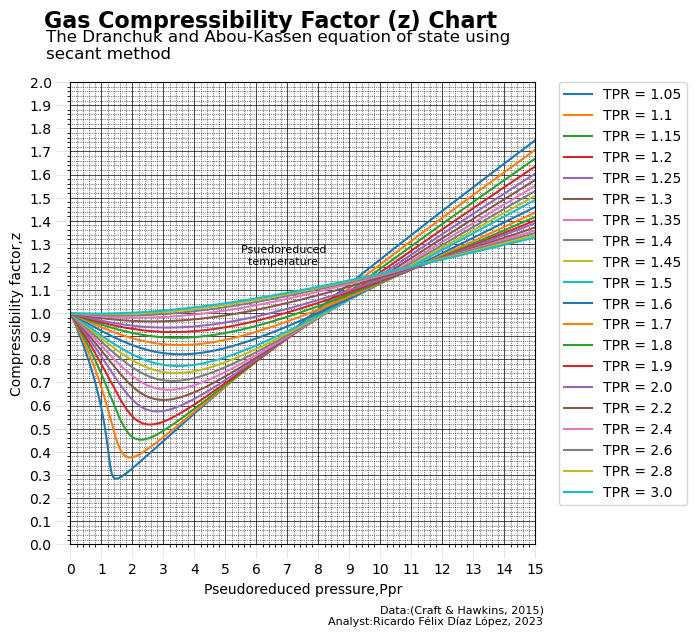

In [110]:
"""
Compresibility Gas Factor from 0 to 15 Ppr
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits
ax.set_xlim(0,15)
ax.set_ylim(0,2)

# setting the ticks
ax.set_xticks(range(16))
ax.set_yticks([i/10 for i in range(21)], [f'{i/10}' for i in range(21)])

# setting as our backgroun as  milimeter paper
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]


# Creating the points of ppr values to graph
ppr_values = np.linspace(0, 15, 400)

# time to graph the 2-D plot 
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.43,
             y=1.1,
             fontweight='bold')

# Adding the axis labels 
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method',
        x = -0.8,
        y = 2.1,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 8.3,
        y = -0.35,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 10,
        y = -0.3,
        fontsize = 8)

# Adding the Tpr
ax.text(s = 'Psuedoreduced \n  temperature',
        x = 5.5,
        y = 1.21,
        fontsize = 8)

# Adding the legend
ax.legend(bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0.)

plt.show();

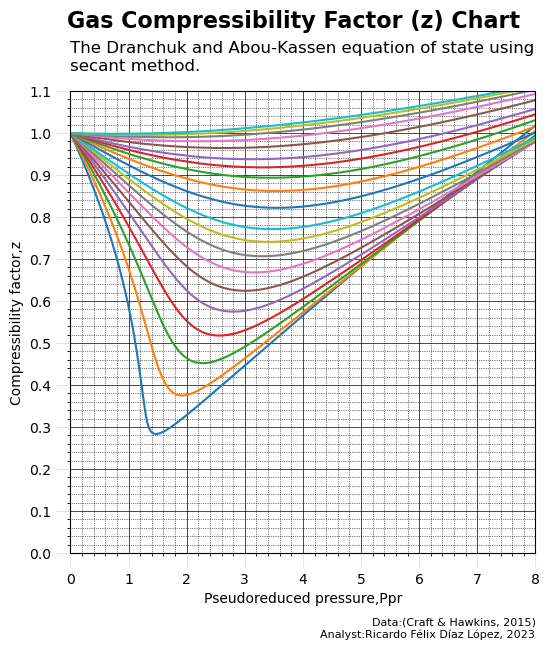

In [66]:
"""
Compresibility Gas Factor from 0 to 8 Ppr and z from 0 to 1.1
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits
ax.set_xlim(0,8)
ax.set_ylim(0,1.1)

# setting the ticks
ax.set_xticks(range(9))
ax.set_yticks([i/10 for i in range(12)], [f'{i/10}' for i in range(12)])

# setting as our backgroun as  milimeter paper
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values
tpr_values = [
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
    1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0
]

# Creating the points of ppr values to graph
ppr_values = np.linspace(0, 8, 400)

# time to graph the 2-D plot 
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.48,
             y=1.12,
             fontweight='bold')

# Adding the axis labels 
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
        x = 0,
        y = 1.15,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 4.29,
        y = -0.2,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 5.19,
        y = -0.17,
        fontsize = 8)

plt.show();

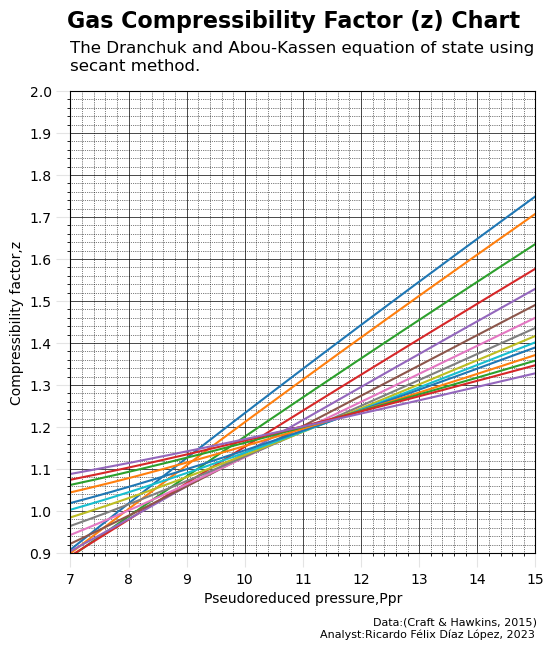

In [108]:
"""
Compresibility Gas Factor from 7 to 15 Ppr and z from 0.9 to 2
"""

#backgrouned info and defining the graph
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
fig.patch.set(facecolor='white')

# setting axis limits
ax.set_xlim(7,15)
ax.set_ylim(0.9,2)

# setting the ticks
ax.set_xticks(range(7,16))
ax.set_yticks([i/10 for i in range(9,21)], [f'{i/10}' for i in range(9,21)])

# setting as our backgroun as  milimeter paper
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Preparing the tpr values
tpr_values = [
    1.05, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7,
    1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 3.0
]

# Creating the points of ppr values to graph
ppr_values = np.linspace(7, 15, 400)

# time to graph the 2-D plot 
for tpr_value in tpr_values:
    z_factor_values = [z_factor(ppr, tpr_value) for ppr in ppr_values]
    ax.plot(ppr_values,
            z_factor_values,
            label=f'TPR = {tpr_value}')

# extending horizontal tickmarks
ax.tick_params(which='major',
               length=10,
               color= '#E4E4E4')

# Adding the title 
ax.set_title("Gas Compressibility Factor (z) Chart",
             fontsize=16,
             x=0.48,
             y=1.12,
             fontweight='bold')

# Adding the axis labels 
ax.set_ylabel("Compressibility factor,z")
ax.set_xlabel("Pseudoreduced pressure,Ppr")

# Adding the subtitle
ax.text(s = 'The Dranchuk and Abou-Kassen equation of state using \nsecant method.',
        x = 7,
        y = 2.05,
        fontsize = 12)

# Adding me
ax.text(s = 'Analyst:Ricardo Félix Díaz López, 2023',
        x = 11.3,
        y = 0.7,
        fontsize = 8)

# Adding the source of data
ax.text(s = 'Data:(Craft & Hawkins, 2015)',
        x = 12.2,
        y = 0.73,
        fontsize = 8)

plt.show();